<a href="https://colab.research.google.com/github/Dipendra-Pal/ANN/blob/main/Dataset_for_Arbitrary_Feature_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Within-Cluster Sum of Squares (WCSS): 3850.1404


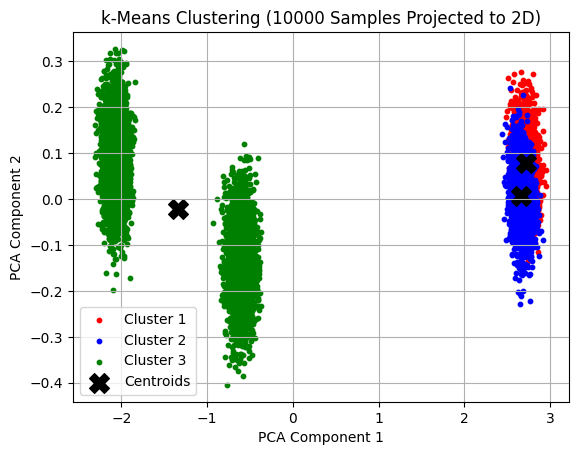

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ---------- Step 1: Load Dataset ----------
df = pd.read_csv("kmeans_10000_data.csv")  # Update path if needed
X = df.values

# ---------- Step 2: Standardize the Data ----------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------- Step 3: k-Means Algorithm ----------
def k_means(X, k, max_iters=100, tol=1e-4):
    np.random.seed(42)
    n_samples, n_features = X.shape

    # Randomly initialize centroids
    initial_indices = np.random.choice(n_samples, size=k, replace=False)
    centroids = X[initial_indices]

    for _ in range(max_iters):
        # Compute distances and assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Compute new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check convergence
        if np.allclose(centroids, new_centroids, atol=tol):
            break

        centroids = new_centroids

    return labels, centroids

# Run k-means
k = 3
labels, centroids = k_means(X_scaled, k)

# ---------- Step 4: Compute WCSS ----------
def compute_wcss(X, labels, centroids):
    wcss = 0.0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        distances = np.linalg.norm(cluster_points - centroids[i], axis=1)
        wcss += np.sum(distances ** 2)
    return wcss

wcss = compute_wcss(X_scaled, labels, centroids)
print(f"Within-Cluster Sum of Squares (WCSS): {wcss:.4f}")

# ---------- Step 5: Visualize Clusters (First 2 PCA components) ----------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)

colors = ['red', 'blue', 'green']
for i in range(k):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], s=10, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.title('k-Means Clustering (10000 Samples Projected to 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()
